# Latar Belakang
## Hubungan Musik dengan Kesehatan Mental dalam Konteks EDA

Kesehatan mental yang semakin menjadi fokus perhatian masyarakat membawa perhatian pada peran potensial musik sebagai alat dukungan. Meskipun bukti awal menunjukkan dampak positif, masih diperlukan EDA mendalam untuk mengisi kesenjangan pengetahuan.

Kekuatan terbesar EDA ini adalah dataset yang kuat, lengkap, dan terawat dengan baik. Dataset yang luas memungkinkan identifikasi korelasi yang signifikan antara preferensi musik, frekuensi mendengarkan, dan kesehatan mental. Dengan demikian, hasil analisis dapat memberikan wawasan yang akurat dan relevan terkait manfaat musik dalam konteks kesehatan mental.

Melalui penerapan pendekatan analisis yang cermat pada dataset yang kaya informasi, kita dapat menghasilkan rekomendasi yang lebih terarah untuk memanfaatkan potensi musik sebagai alat dukungan kesehatan mental yang efektif.

# DATA

In [5]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6491-0973

 Directory of c:\Document Kuliah\Tugas Kuliah

12/12/2023  21:23    <DIR>          .
22/10/2023  02:11    <DIR>          ..
11/12/2023  00:04         1.387.294 5027231014_Muhamad Arrayyan_KPP LKMW.pdf
27/11/2023  15:16            18.904 BAB 1PENDAHULUAN.docx
18/11/2023  22:19            17.561 Code Sorting.docx
09/10/2023  08:57            23.914 Copy of Kuis_Etika_Media_Sosial_Kelompok_7(1).xlsx
25/10/2023  12:33            14.461 Diketahui bahwa mobil A melaju dengan kecepatan konstan sebesar 60 km.docx
12/12/2023  21:29           998.834 FINAL_PROJECT_STATPROB_KELOMPOK_9.ipynb
11/10/2023  20:53            25.027 Kelompok 7 HETI B.docx
11/10/2023  19:37            88.271 Kelompok 7_Etika Media Sosial_HETI B.xlsx
23/09/2023  17:31             8.653 KONTRAK KINERJA MAHASISWA KIPK SEMESTER 1 (1).docx
09/10/2023  08:22            23.974 Kuis Etika Media Sosial Kelompok 7.xlsx
29/10/2023  19:39           330.412 Manipul

In [6]:
import pandas as pd

df = pd.read_csv("mxmh_survey_results.csv")
df.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

# Latar Belakang Responden


## 1. Musik

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

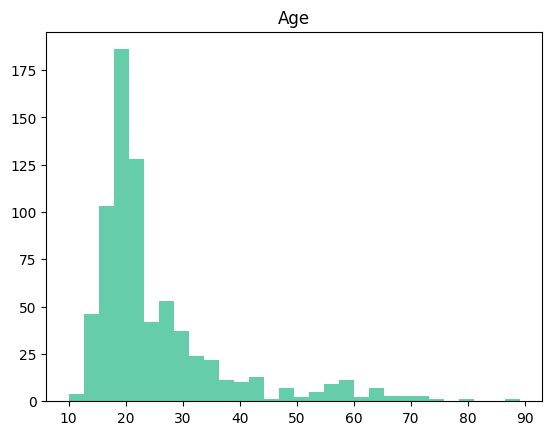

In [ ]:
import numpy as np

df.hist(['Age'], bins=30, color='mediumaquamarine', grid=False)

In [ ]:
df['Age'].value_counts().loc[lambda x : x>50]

18.0    85
19.0    61
17.0    59
21.0    52
Name: Age, dtype: int64

In [ ]:
df['Age'].max()

89.0

Sebagian besar responden berusia akhir remaja atau awal dua puluhan, sehingga kehadiran seorang responden berusia 89 tahun merupakan anomali yang menarik!

> Distribusi usia masuk akal, karena survei yang digunakan untuk mengumpulkan data diiklankan di forum diskusi dan situs media sosial yang menargetkan demografi ini. Hal ini dapat menimbulkan bias usia, yaitu memengaruhi genre musik mana yang paling populer.

Text(0, 0.5, '')

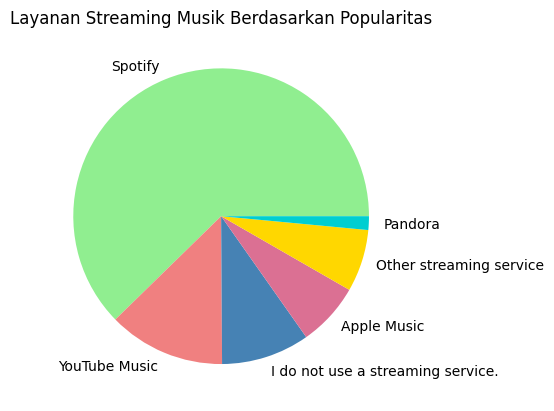

In [ ]:
import matplotlib.pyplot as plt

s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Layanan Streaming Musik Berdasarkan Popularitas')
plt.ylabel("")

In [ ]:
df['Primary streaming service'].value_counts(normalize=True)

Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: Primary streaming service, dtype: float64

Text(0.5, 1.0, 'Layanan Streaming Musik Pilihan Berdasarkan Usia')

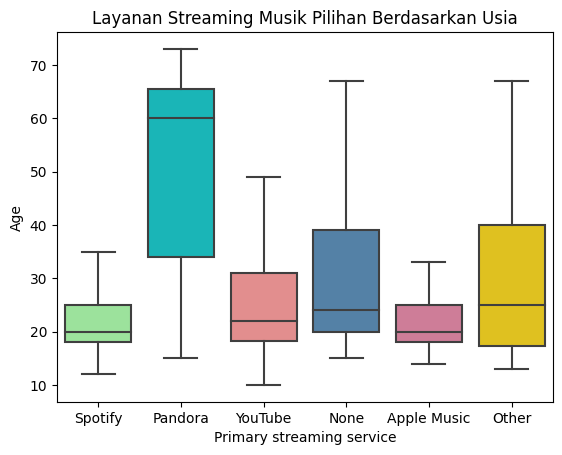

In [ ]:
import seaborn as sns

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Layanan Streaming Musik Pilihan Berdasarkan Usia')

In [ ]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           24.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

Spotify adalah layanan streaming musik yang paling populer, mencakup 62% dari seluruh responden. Spotify, bersama dengan Apple Music, juga memiliki basis pengguna yang sedikit lebih muda dibandingkan platform streaming lainnya. Pandora memiliki basis pengguna tertua sejauh ini, dengan median usia pengguna sekitar 60 tahun.

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

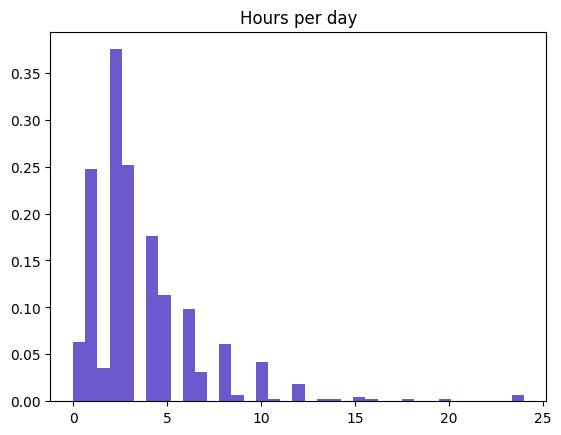

In [ ]:
df.hist(['Hours per day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [ ]:
df['Hours per day'].value_counts().loc[lambda x : x>100]

2.0    173
3.0    120
1.0    117
Name: Hours per day, dtype: int64

Sebagian besar responden mendengarkan musik antara 0-5 jam per hari. Setelah batas ini, jumlah responden yang mendengarkan musik lebih dari 5 jam per hari menurun hampir secara eksponensial. Ada beberapa responden yang mengaku mendengarkan musik 24 jam sehari.

<Axes: ylabel='Composer'>

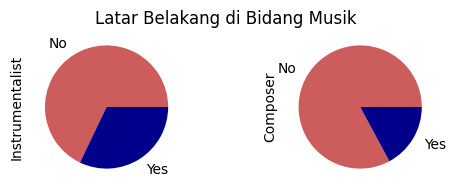

In [ ]:
fig = plt.figure(figsize=(6,2))

plt.suptitle("Latar Belakang di Bidang Musik")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

Sebagian besar responden tidak memainkan alat musik. Bahkan lebih jarang lagi responden yang menggubah musik.

In [ ]:
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

<ipython-input-123-73ac9ef5036f>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
<ipython-input-123-73ac9ef5036f>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
<ipython-input-123-73ac9ef5036f>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In

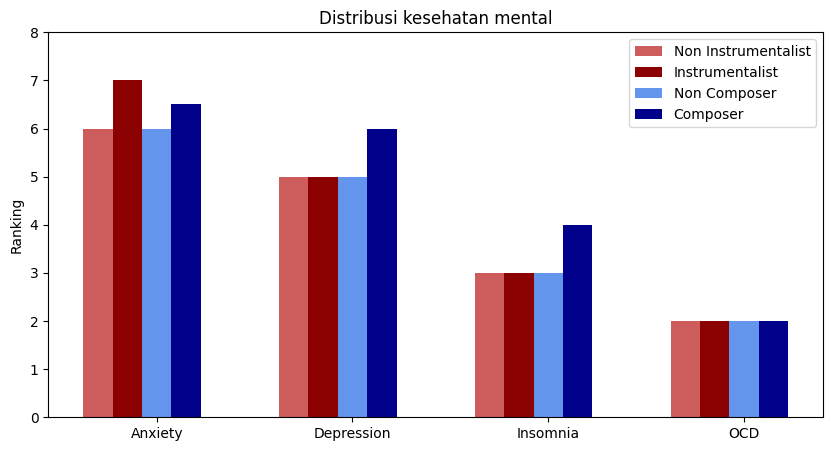

In [ ]:
labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
b3 = ax.bar(x, df[(df.Composer == 0)].median()[-4:], width, color = 'cornflowerblue', label = "Non Composer")
b4 = ax.bar(x+width, df[(df.Composer == 1)].median()[-4:], width, color = 'darkblue', label = "Composer")

ax.set_ylim([0, 8])
ax.set_ylabel('Ranking')
ax.set_title('Distribusi kesehatan mental')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

Instrumentalis dan komposer memiliki peringkat MH yang sedikit lebih tinggi. Namun, peringkat OCD rendah terlepas dari latar belakang musiknya.

<ipython-input-124-2a3e4868db5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = df.corr()


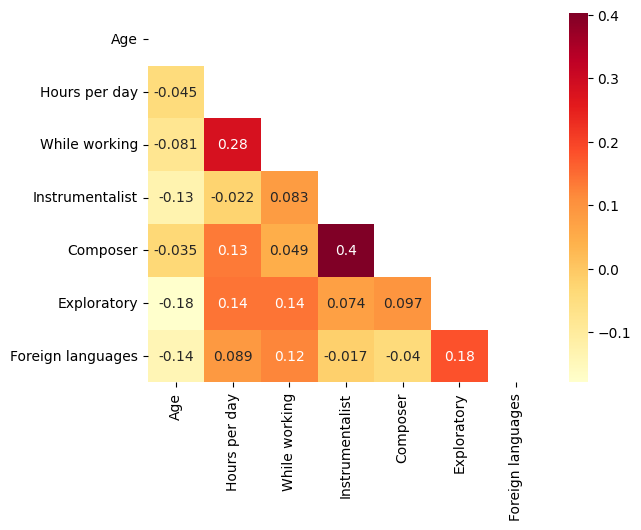

In [ ]:
corr_m = df.corr()
corr_m1 = corr_m.iloc[:-5 , :-5]

mask = np.triu(corr_m1)

sns.heatmap(corr_m1, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

**Tren linier yang kuat**

Seperti yang diharapkan, terdapat korelasi yang signifikan antara individu yang memainkan musik dan individu yang menggubah musik. Demikian pula, terdapat hubungan yang kuat antara total jam mendengarkan per hari dan jam mendengarkan saat bekerja.

**Tren linier yang lebih lemah: responden eksplorasi**

- Semakin banyak jam yang dihabiskan untuk mendengarkan musik, semakin besar kemungkinan seseorang secara aktif mengeksplorasi musik baru.
- Individu yang mendengarkan musik sambil bekerja lebih cenderung mengeksplorasi musik baru dan mendengarkan musik dalam berbagai bahasa.
- Individu yang mendengarkan musik dalam bahasa asing lebih cenderung mengeksplorasi musik baru.
- Orang yang lebih tua kurang tertarik untuk mengeksplorasi musik baru.

## 2. Kesehatan Mental

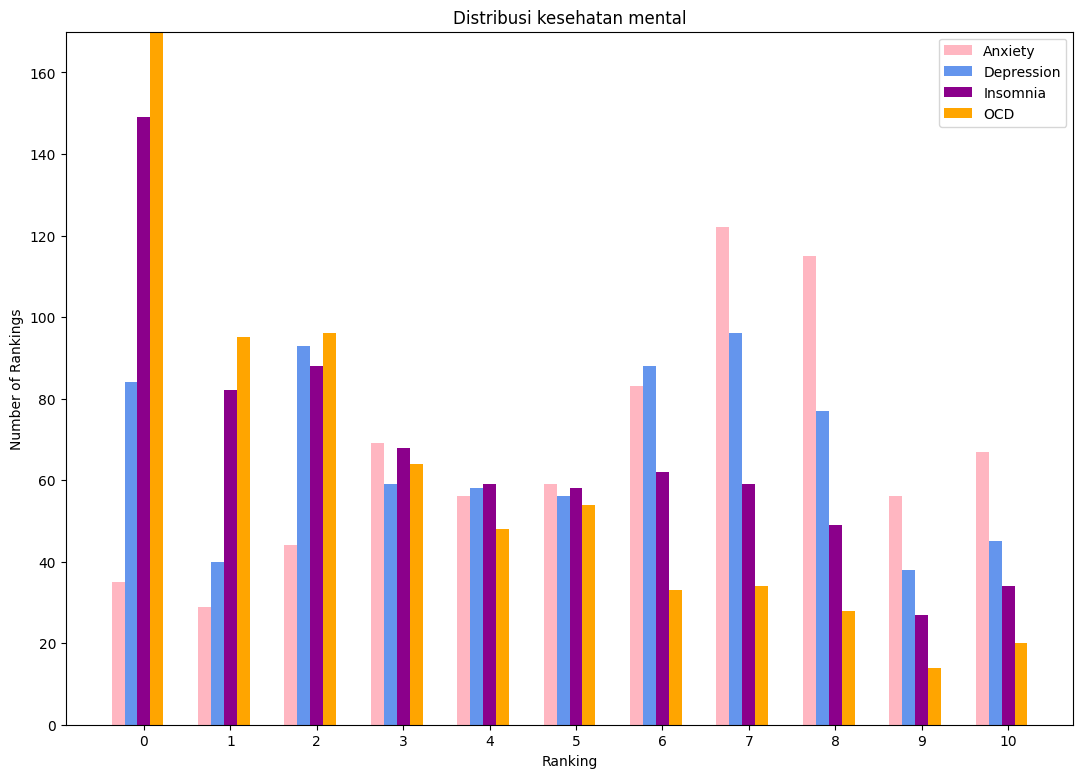

In [ ]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Distribusi kesehatan mental')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [ ]:
# get value for number of OCD rankings at 0

max(disorder_count)

248

In [ ]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


Peningkatan peringkat untuk depresi dan anxiety (kecemasan) sangat umum terjadi, dengan rata-rata peringkat masing-masing 5 dan 6. Di antara setiap peringkat, popularitas juga tampaknya bergerak ke arah yang sama (yaitu, dari peringkat 1 ke 2, popularitas peringkat ini meningkat baik untuk kecemasan maupun depresi.) Yang menarik (walaupun mengkhawatirkan), individu tertentu lebih cenderung untuk menentukan peringkat depresi. pada 10 dari 0.

Insomnia agak umum dan didistribusikan secara lebih adil di luar peringkat 0. Namun, peringkat insomnia menunjukkan tren penurunan popularitas seiring dengan meningkatnya peringkat.

Dengan 0 sebagai modusnya, OCD adalah gangguan yang paling jarang terjadi. Sama halnya dengan peringkat insomnia, seiring dengan meningkatnya peringkat OCD, popularitasnya cenderung menurun.

### Listening time & MH

<ipython-input-128-9e1d5992aea2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
<ipython-input-128-9e1d5992aea2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
<ipython-input-128-9e1d5992aea2>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or s

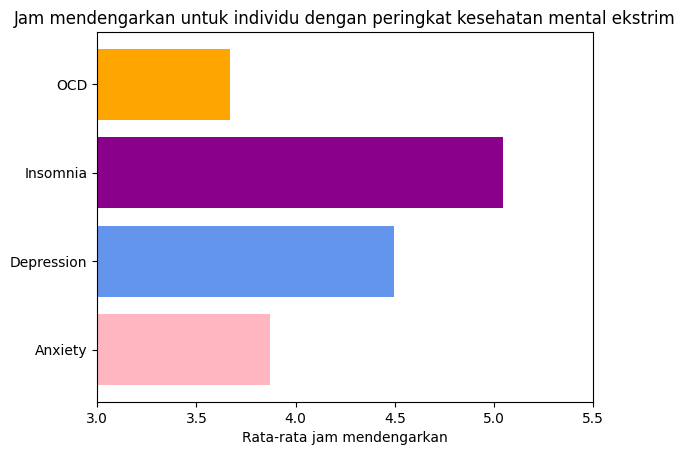

In [ ]:
anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean()[1]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))

plt.xlabel("Rata-rata jam mendengarkan")
plt.title("Jam mendengarkan untuk individu dengan peringkat kesehatan mental ekstrim")
plt.xlim(3,5.5)
plt.show()


Peringkat MH ekstrem didefinisikan sebagai peringkat 9 atau 10. Penderita insomnia ekstrem memerlukan waktu mendengarkan lebih lama dibandingkan dengan individu dengan peringkat ekstrem di kategori lain. Orang dengan OCD ekstrem mempunyai waktu mendengarkan yang sedikit lebih rendah. Namun, perbedaan-perbedaan ini mungkin dianggap dapat diabaikan.

Perhatikan bahwa individu mungkin berada dalam beberapa kategori ekstrim jika mereka menjawab angka 9 atau 10 untuk beberapa kategori MH.

<ipython-input-129-3e79ee3c39e7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
<ipython-input-129-3e79ee3c39e7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
<ipython-input-129-3e79ee3c39e7>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or

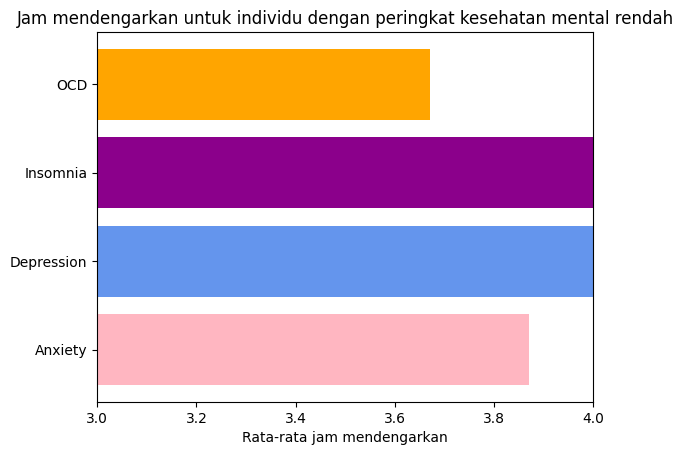

In [ ]:
anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
insomnia_extreme2 = df.loc[(df['Insomnia'] < 3)].mean()[1]
ocd_extreme2 = df.loc[(df['OCD'] < 3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))

plt.xlabel("Rata-rata jam mendengarkan")
plt.title("Jam mendengarkan untuk individu dengan peringkat kesehatan mental rendah")
plt.xlim(3,4)
plt.show()


Peringkat MH yang rendah didefinisikan sebagai peringkat 0, 1, atau 2. Menariknya, individu dengan insomnia rendah mengalami penurunan rata-rata jam mendengarkan yang signifikan dibandingkan dengan rekan mereka yang ekstrim. Hal ini juga terjadi pada individu dengan depresi rendah.

Perhatikan bahwa individu mungkin ada dalam beberapa kategori jika mereka menjawab 0, 1 atau 2 untuk beberapa kategori MH. Perlu diperhatikan juga bahwa skala jam pada gambar ini berbeda dengan gambar sebelumnya.

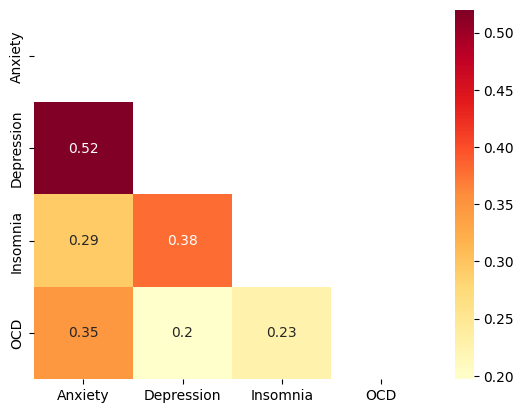

In [ ]:
corr_m2 = corr_m.iloc[8: , 8:]
mask = np.triu(corr_m2)

sns.heatmap(corr_m2, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

Keempat kondisi tersebut menunjukkan tumpang tindih yang signifikan satu sama lain, dengan depresi dan kecemasan menunjukkan korelasi linier yang paling kuat. Hal ini sesuai dengan pengamatan kami dari grafik "Distribusi peringkat kesehatan mental".

OCD agak terkait dengan kategori lain, namun matriks korelasi tidak menyiratkan hubungan yang kuat.

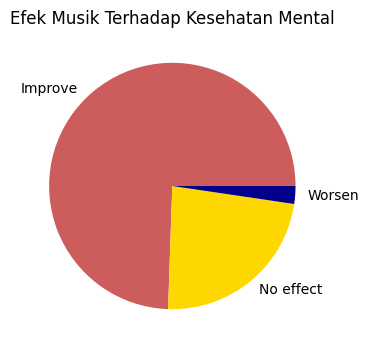

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Efek Musik Terhadap Kesehatan Mental')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');

In [ ]:
effects

Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64

Mayoritas responden berpendapat bahwa musik berdampak positif terhadap kesehatan mental mereka. Dari responden yang tersisa, hanya 15 orang yang melaporkan bahwa musik mempunyai dampak negatif.

# Genre Musik

Text(0, 0.5, '')

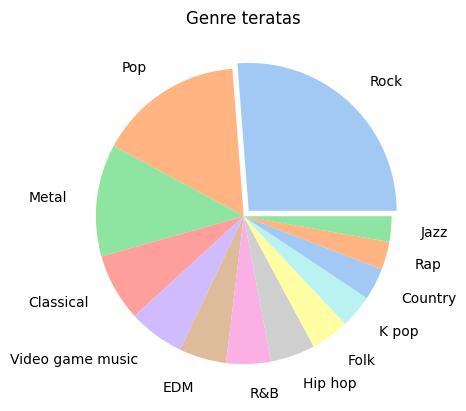

In [ ]:
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2,
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
            colors = sns.color_palette('pastel')[0:13])

plt.title('Genre teratas')
plt.ylabel("")

Rock adalah genre paling populer, dipilih sebagai genre favorit seseorang 1 dari 4 kali. Dalam hal popularitas, rock diikuti oleh pop dan metal. Lofi, Gospel, dan musik Latin dipilih kurang dari 0,14% dari waktu dan tidak muncul dalam grafik lingkaran di atas.

Untuk rincian genre berdasarkan frekuensi mendengarkan, silakan lihat gambar "(Lebih Mendalam) Genre berdasarkan Popularitas".

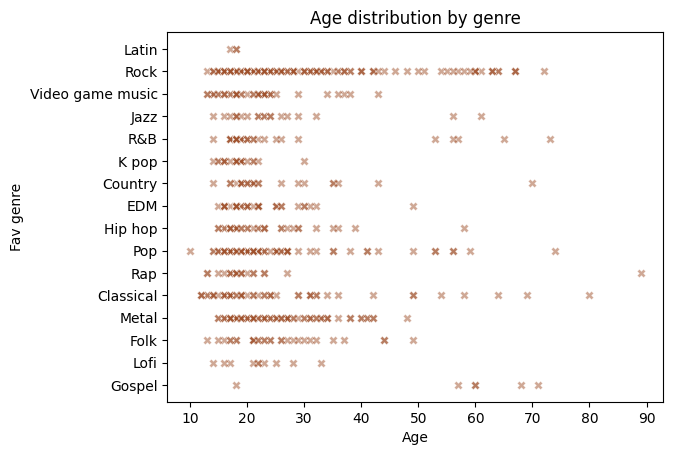

In [ ]:
# age and genre

sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');


Genre Rock memiliki rentang usia yang paling beragam. Pendengar musik Klasik dan Pop juga memiliki rentang usia yang lebih luas dibandingkan dengan genre lainnya. Beberapa genre musik, seperti K-pop dan Lofi, terlihat menarik bagi kelompok usia yang lebih spesifik dan lebih muda.

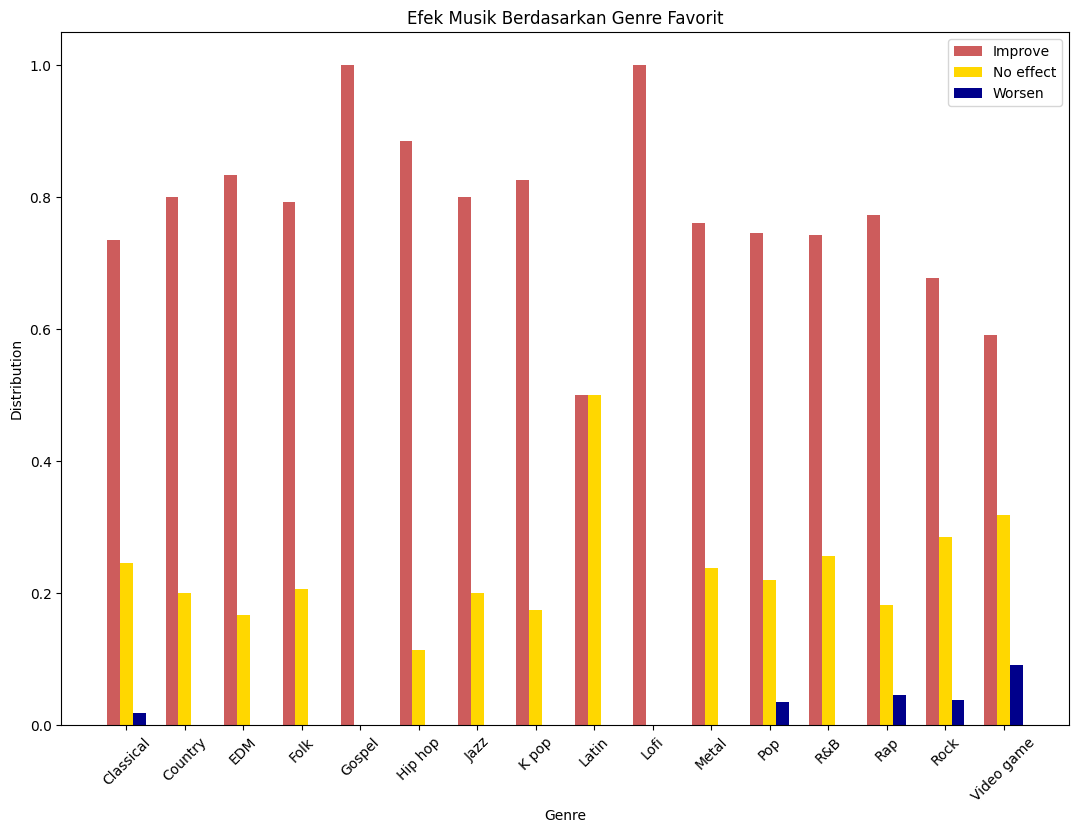

In [ ]:
df.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = df['Fav genre'].unique()
g_all.sort()
fg_df = df.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-width, imp_dist, width, label="Improve", color = 'indianred')
b2 = ax.bar(x, no_eff_dist, width, label="No effect", color = 'gold')
b3 = ax.bar(x+width, wors_dist, width, label="Worsen", color = 'darkblue')

plt.title("Efek Musik Berdasarkan Genre Favorit")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()

- Terlepas dari genre, sebagian besar responden setuju bahwa musik memiliki dampak positif pada kesehatan mental. Hal ini didukung oleh gambar "Efek Musik terhadap Kesehatan Mental".
- Individu yang memilih Gospel dan Lofi sebagai genre favorit mereka dengan bulat merasa bahwa musik bermanfaat.
- Individu yang memilih Musik Video Game sebagai genre favorit memiliki distribusi tanggapan yang paling beragam. Sekitar 40% dari responden ini tidak menemukan musik bermanfaat sama sekali, dengan 10% dari responden melaporkan dampak negatif pada kesehatan mental mereka.
- Satu-satunya responden lain yang merasa bahwa musik berdampak merugikan adalah responden yang memilih musik Klasik, Pop, Rap, atau Rock sebagai genre teratas mereka.

### BPM

In [ ]:
print(df['BPM'].max())
print(df['BPM'].min())

999999999.0
0.0


The survey system isn't perfect. Online trolls claiming to listen to music with 999999999 BPM may mess up data.

In [ ]:
# filter out noise by creating upper and lower bounds

df = df[(df.BPM < 500) & (df.BPM > 20)]
print(df['BPM'].max())
print(df['BPM'].min())

220.0
40.0


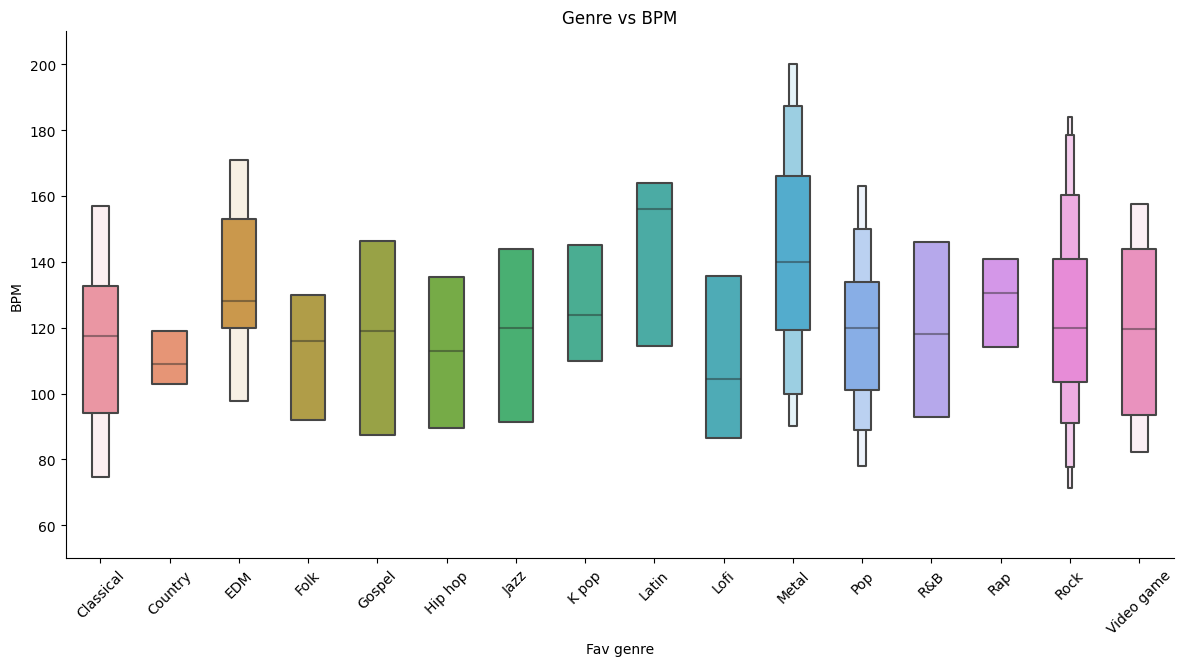

In [ ]:
sns.catplot(
    data=df.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5,
    showfliers=False,
)

plt.xticks(rotation = 45)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

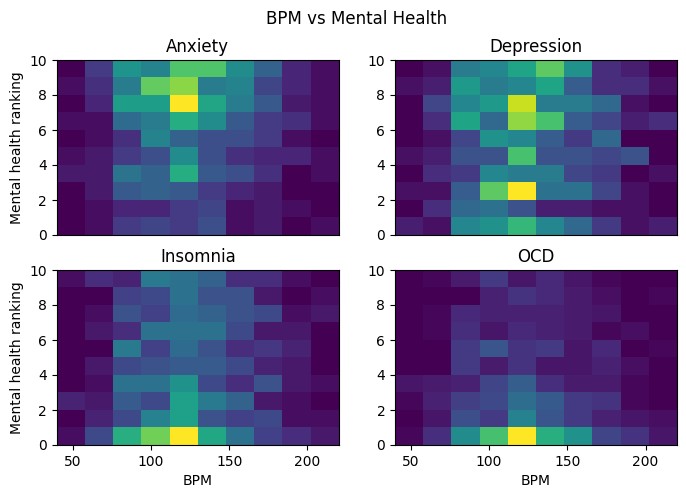

In [ ]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);

In [ ]:
df['MH Score'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

<ipython-input-140-8de3fa48183e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MH Score'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']


In [ ]:
df.nsmallest(50, ['MH Score'])['BPM'].mean()

123.26

In [ ]:
df.nlargest(50, ['MH Score'])['BPM'].mean()

122.26

Tidak ada korelasi yang jelas antara BPM dan peringkat kesehatan mental.

### Genre

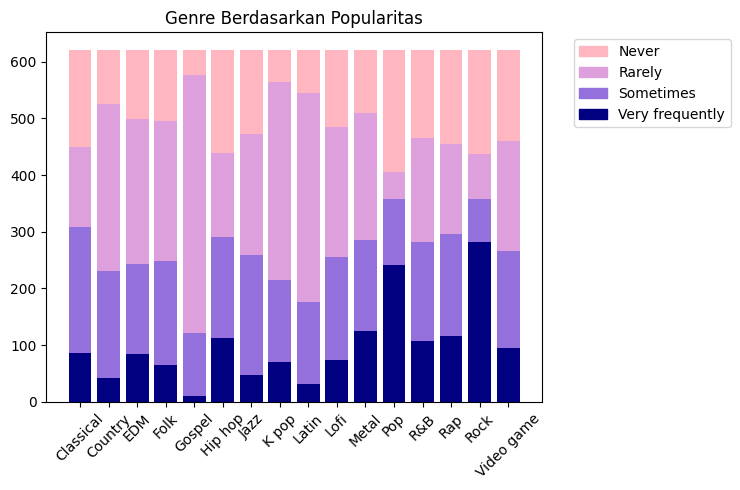

In [ ]:
import matplotlib.patches as mpatches

i = 11

r_dist = []
s_dist = []
n_dist = []
vf_dist = []

while i != 27:
    freq_dist = df.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])

    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    ax.bar(i, r_dist[i], label='Rare', bottom = vf_dist[i] + s_dist[i], color = "plum")
    ax.bar(i, s_dist[i], label='Sometimes', bottom = vf_dist[i], color = "mediumpurple")
    ax.bar(i, n_dist[i], label='Never', bottom=vf_dist[i] + s_dist[i] + r_dist[i], color = "lightpink")
    ax.bar(i, vf_dist[i], label='Very frequently', color = "navy")

ax.set_title('Genre Berdasarkan Popularitas')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(g_all)
plt.xticks(rotation = 45)

patch1 = mpatches.Patch(color='lightpink', label='Never')
patch2 = mpatches.Patch(color='plum', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='navy', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [ ]:
import itertools

med_list = []
med_list2 = []
med_list3 = []
med_list4 = []

df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        [0, 1, 2, 3], inplace=True)

for i in range (11, 27):
    freq_genre = df.columns[i]
    med_list.append(pd.pivot_table(df, values='Anxiety', index=freq_genre, aggfunc="median").values.tolist())
    med_list2.append(pd.pivot_table(df, values='Depression', index=freq_genre, aggfunc="median").values.tolist())
    med_list3.append(pd.pivot_table(df, values='Insomnia', index=freq_genre, aggfunc="median").values.tolist())
    med_list4.append(pd.pivot_table(df, values='OCD', index=freq_genre, aggfunc="median").values.tolist())

def m_vs_gfreq(mlist, fig_name, bd1, bd2):

    r_dist = []
    s_dist = []
    n_dist = []
    vf_dist = []

    for i in range (0, 16):
        n_dist.append(mlist[i][0])
        r_dist.append(mlist[i][1])
        s_dist.append(mlist[i][2])
        vf_dist.append(mlist[i][3])

    labels = g_all
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10, 4))

    b1 = ax.bar(x-2*width, list(itertools.chain(*n_dist)), width, label="Never", color = 'lightpink')
    b2 = ax.bar(x-width, list(itertools.chain(*r_dist)), width, label="Rarely", color = 'plum')
    b3 = ax.bar(x, list(itertools.chain(*s_dist)), width, label="Sometimes", color = 'mediumpurple')
    b4 = ax.bar(x+width, list(itertools.chain(*vf_dist)), width, label="Very Frequently", color = 'navy')

    ax.set_ylim(bd1, bd2)
    ax.set_ylabel('Ranking')
    ax.set_title(fig_name)
    ax.set_xticks(x, labels)
    ax.legend(loc='upper left')

    plt.xticks(rotation = 45)
    plt.show()

<ipython-input-144-e8d9494a97d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],


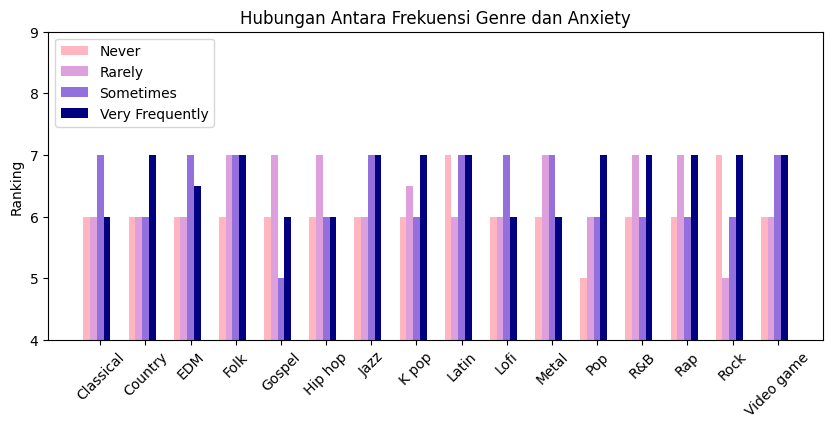

In [ ]:
m_vs_gfreq(med_list, 'Hubungan Antara Frekuensi Genre dan Anxiety', 4, 9)

- Untuk sebagian besar genre, hubungan yang konsisten tidak ada atau dapat diabaikan.
- Sangat sering mendengarkan musik Country berkorelasi dengan peringkat kecemasan yang sedikit lebih tinggi.
- Tidak pernah mendengarkan musik Folk dengan peringkat kecemasan sedikit lebih rendah.
- Hubungan yang paling konsisten adalah antara kecemasan dan frekuensi Pop. Ketika frekuensinya meningkat, peringkat kecemasan pun meningkat.
- Bagi responden yang memilih "Kadang-kadang" atau "Sangat Sering" untuk musik EDM, Jazz, atau Video game, responden juga melaporkan tingkat kecemasan yang lebih tinggi dibandingkan responden yang memilih "Jarang" atau "Tidak Pernah".

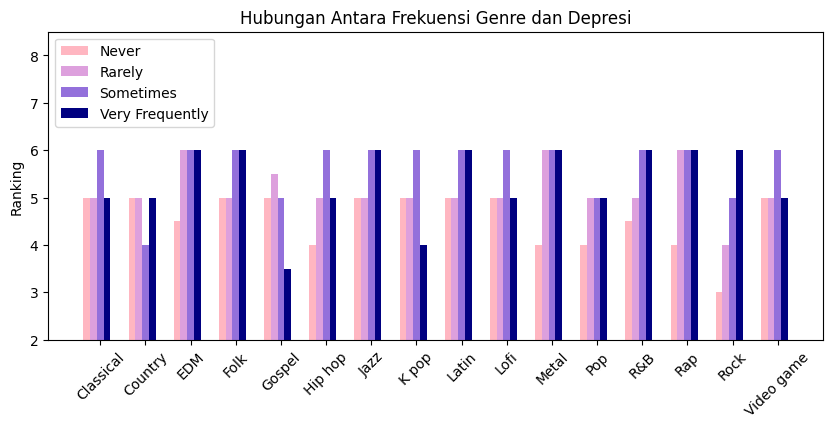

In [ ]:
m_vs_gfreq(med_list2, 'Hubungan Antara Frekuensi Genre dan Depresi', 2, 8.5)

- Untuk sebagian besar genre, hubungan yang konsisten tidak ada atau dapat diabaikan.
- Sangat sering mendengarkan musik Gospel berkorelasi dengan peringkat depresi yang lebih rendah.
- Tidak pernah mendengarkan EDM, Hip hop, Metal, Rap, Rock, atau Pop berkorelasi dengan peringkat depresi yang sedikit lebih rendah.
- Hubungan yang paling konsisten adalah antara frekuensi Rock vs depresi dan R&B vs depresi. Dalam kedua kasus tersebut, seiring dengan meningkatnya frekuensi, peringkat depresi juga meningkat.

Mari kita gambarkan Rock secara individual untuk memvisualisasikannya:

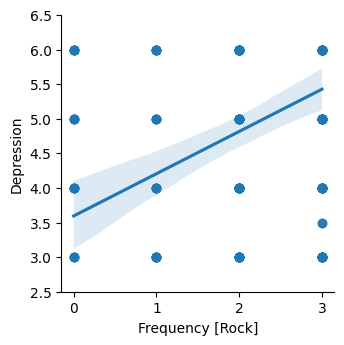

In [ ]:
fig = sns.lmplot(x ='Frequency [Rock]', y ='Depression', data = df, height=3.5)
fig.set(ylim=(2.5, 6.5))

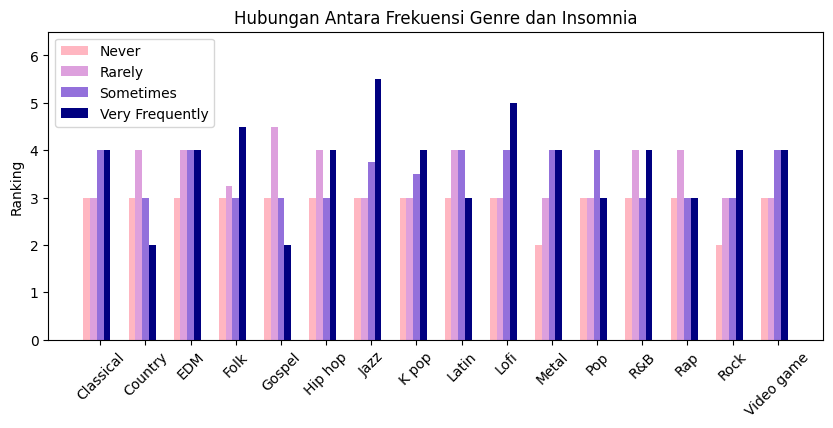

In [ ]:
m_vs_gfreq(med_list3, 'Hubungan Antara Frekuensi Genre dan Insomnia', 0, 6.5)

- Untuk sebagian besar genre, hubungan yang konsisten tidak ada atau dapat diabaikan.
- Pendengar musik Country dan Gospel yang sangat sering melaporkan peringkat insomnia yang lebih rendah.
- Berbeda dengan Metal, Lofi, Jazz, Rock, dan K Pop. Untuk genre ini, frekuensi yang lebih tinggi berkorelasi dengan peringkat insomnia yang lebih tinggi.
- Pendengar Folk, Jazz, dan Lofi yang sangat sering melaporkan peringkat insomnia tertinggi.

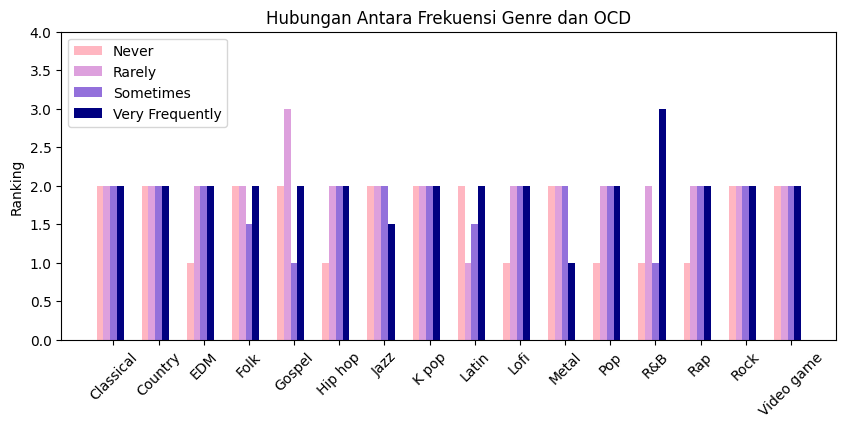

In [ ]:
m_vs_gfreq(med_list4, 'Hubungan Antara Frekuensi Genre dan OCD', 0,4)

- Untuk sebagian besar genre, hubungan yang konsisten tidak ada atau dapat diabaikan.
- Sangat sering mendengarkan R&B berkorelasi dengan peringkat OCD yang lebih tinggi.

In [ ]:
print('Genre favorit dari gabungan pencetak gol MH tertinggi:')
df.nlargest(60, ['MH Score'])['Fav genre'].value_counts()

Genre favorit dari gabungan pencetak gol MH tertinggi:


Rock          14
Pop            9
Metal          8
EDM            6
Classical      4
Folk           3
Video game     3
R&B            3
Lofi           3
K pop          2
Jazz           2
Country        1
Hip hop        1
Rap            1
Name: Fav genre, dtype: int64

In [ ]:
print('Favorite genres of lowest combined MH scorers:')
df.nsmallest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of lowest combined MH scorers:


Rock          12
Metal          9
Pop            8
Classical      6
EDM            4
R&B            4
Country        4
Rap            3
Jazz           3
K pop          3
Folk           1
Video game     1
Latin          1
Gospel         1
Name: Fav genre, dtype: int64

Perhatikan popularitas genre secara keseluruhan, sebagaimana diuraikan dalam gambar "Perincian genre teratas". Nilai yang lebih tinggi diharapkan untuk genre seperti Rock, Pop, dan Metal.

Mengingat musik Latin dan Gospel hanya menyumbang sebagian kecil dari genre favorit yang dilaporkan, patut dicatat bahwa kedua genre ini muncul di daftar kedua. Hal ini menunjukkan bahwa musik Latin dan Gospel mungkin memiliki korelasi yang signifikan dengan skor MH yang lebih rendah. Hal ini diperkuat oleh plot yang dihasilkan oleh fungsi m_vs_gfreq.

(Tentu saja, berkurangnya populasi pecinta musik Latin dan Gospel berarti hasil ini lebih rentan terhadap kebisingan.)

Country dan Rap juga lebih sering muncul untuk peraih skor MH terendah.

Di sisi lain, EDM muncul sedikit lebih sering pada mereka yang memiliki skor MH tertinggi, hal ini diperkirakan karena mendengarkan EDM lebih sering umumnya menghasilkan skor MH yang lebih tinggi di semua kategori.

Menariknya lagi, Lofi tidak muncul di daftar kedua, melainkan muncul 3 kali di daftar pertama. Sebagaimana diuraikan dalam gambar "Hubungan antara Insomnia & Frekuensi Genre", penikmat Lofi cenderung lebih menderita insomnia yang mungkin menjelaskan temuan ini.


**Hasil yang mengejutkan**

Meskipun diakui bahwa Rock adalah genre yang paling populer, nilai-nilai di atas cukup mengejutkan. Menurut plot m_vs_gfreg, pendengar musik rock memiliki peringkat lebih tinggi untuk Insomnia dan Depresi. Namun, Rock memiliki jumlah nilai yang sebanding di kedua daftar.

Demikian pula, mendengarkan musik Jazz sering kali menunjukkan peringkat yang lebih tinggi untuk Kecemasan, Depresi, dan terutama Insomnia. Namun, Jazz muncul di kedua daftar dengan jumlah nilai yang serupa.

# Kesimpulan
Ada banyak pola kecil antara selera musik dan kesehatan mental. Namun, beberapa faktor seperti BPM, tidak berperan signifikan. Genre individu juga memiliki tingkat pengaruh yang berbeda-beda, bergantung pada kategori MH. Misalnya, frekuensi seseorang mendengarkan musik Rock lebih terkait dengan peringkat depresi dibandingkan frekuensi Lofi. Namun, Lofi terkait dengan peringkat Insomnia yang lebih tinggi.

Oleh karena itu, tidak tepat jika menganggap satu genre sebagai yang "paling berbahaya".

In [ ]:
df.nlargest(1, ['MH Score'])['Fav genre']

562    Folk
Name: Fav genre, dtype: object

Namun, musik Folk menjadi genre favorit bagi pemain skor Kesehatan Mental (MH) tertinggi secara keseluruhan. (Namun, perlu diingat bahwa ini hanya berdasarkan satu contoh dan tidak dapat digeneralisasi untuk keseluruhan dataset.)